# 데이터 스크래핑
데이터 스크래핑은 웹 사이트나 온라인 소스에서 원하는 데이터를 자동으로 추출하는 기술을 의미합니다. 이 과정을 통해 사람이 일일이 데이터를 수집하지 않고도, 프로그램을 이용하여 대량의 정보를 빠르게 모을 수 있습니다.

## robots.txt 파일
웹사이트의 루트 디렉토리에 위치한 텍스트 파일로, 웹 크롤러(검색 엔진 로봇)나 스크래퍼에게 어떤 페이지나 디렉토리를 크롤링해도 되는지, 또는 크롤링하지 말아야 하는지 지시하는 역할을 합니다.

* User-agent: 각 지시문이 적용되는 크롤러를 지정합니다.
* Disallow: 해당 경로에 있는 페이지나 디렉토리에 접근하지 말라는 지시입니다.
* Allow: Disallow 규칙이 적용되는 범위 중에서 특정 경로는 접근을 허용하는 경우 사용합니다.

## GET 요청
GET은 서버에서 데이터를 “요청”할 때 사용하는 메서드입니다. URL에 필요한 정보(쿼리 파라미터)를 포함하여 보내며, 주로 데이터를 조회할 때 사용됩니다.

* HTML 소스 가져오기

In [4]:
import requests

# 대상 사이트 URL
url = "http://example.com"

# GET 요청을 보내 HTML 소스 가져오기
response = requests.get(url)

# 응답 상태 코드 확인 (200이면 성공)
print("상태 코드:", response.status_code)

상태 코드: 200


* HTML 소스 출력하기

In [5]:
# HTML 소스 출력 (문자열 형태)
html_content = response.text
print("HTML 소스:\n", html_content)

HTML 소스:
 <!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>

* 간단한 데이터 추출 (예: 제목 추출)

In [6]:
from bs4 import BeautifulSoup

# BeautifulSoup 객체 생성 (HTML 파싱)
soup = BeautifulSoup(html_content, 'html.parser')

# <title> 태그의 내용 추출
page_title = soup.title.string
print("페이지 제목:", page_title)

# <h1> 태그의 내용 추출
h1_text = soup.find('h1').string
print("헤더 텍스트:", h1_text)

# 첫 번째 <p> 태그의 내용 추출
p_text = soup.find('p').string
print("본문 내용:", p_text)

페이지 제목: Example Domain
헤더 텍스트: Example Domain
본문 내용: This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.


## 연습문제
1. 로또 데이터를 모두 수집한 후, 번호별 출현횟수를 구하고 이를 시각화하세요.

In [15]:
import requests
def make_numbers(html):
    box = html.find("div", class_ = "lottonum").find_all("span")
    del box[6:8]
    
    numbers = []
    for i in box:
        numbers.append(int(i.text))
    return numbers

In [17]:
from bs4 import BeautifulSoup
import time

total = []
for i in range(1, 1160):
    url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={i}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
    html = BeautifulSoup(url.text)
    numbers = make_numbers(html)
    total.append(numbers)
    print(f"{i}회 로또 데이터 저장완료 : {numbers}")
    time.sleep(2)

1회 로또 데이터 저장완료 : [10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장완료 : [9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장완료 : [11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장완료 : [14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장완료 : [16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장완료 : [14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장완료 : [2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장완료 : [8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장완료 : [2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장완료 : [9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장완료 : [1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장완료 : [2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장완료 : [22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장완료 : [2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장완료 : [3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장완료 : [6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장완료 : [3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장완료 : [3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장완료 : [6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장완료 : [10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장완료 : [6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장완료 : [4, 5, 6, 8, 17, 39, 25]
23회 로또 

In [18]:
i = 1160
url = requests.get(f"https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={i}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8")
html = BeautifulSoup(url.text)
numbers = make_numbers(html)
total.append(numbers)
print(f"{i}회 로또 데이터 저장완료 : {numbers}")

1160회 로또 데이터 저장완료 : [7, 13, 18, 36, 39, 45, 19]


In [124]:
import pandas as pd
lotto = pd.DataFrame(total, columns = ['1번째','2번째','3번째','4번째','5번째','6번째','보너스'])
lotto.index = [f"{i}회차" for i in range(1,1161)]

lotto

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
1회차,10,23,29,33,37,40,16
2회차,9,13,21,25,32,42,2
3회차,11,16,19,21,27,31,30
4회차,14,27,30,31,40,42,2
5회차,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
1156회차,30,31,34,39,41,45,7
1157회차,5,7,12,20,25,26,28
1158회차,21,25,27,32,37,38,20
1159회차,3,9,27,28,38,39,7


In [66]:
A = lotto.melt(value_name="number")
result = A["number"].value_counts().sort_index()
print(result)

number
1     191
2     179
3     188
4     187
5     170
6     187
7     189
8     171
9     149
10    182
11    182
12    196
13    195
14    186
15    181
16    182
17    191
18    186
19    181
20    188
21    181
22    154
23    156
24    183
25    161
26    188
27    196
28    167
29    159
30    179
31    184
32    171
33    195
34    201
35    182
36    179
37    186
38    188
39    181
40    185
41    158
42    168
43    193
44    179
45    185
Name: count, dtype: int64


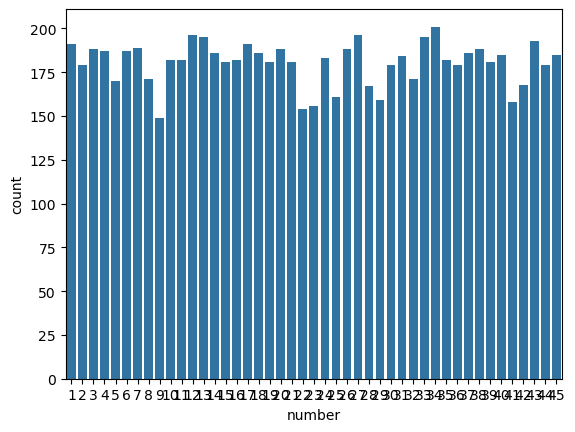

In [68]:
import seaborn as sns
import matplotlib.pylab as plt
sns.countplot(data=A, x="number")
plt.show()

2. 최근 데이터를 기준으로, 번호별로 몇 주 동안 출현하지 않았는지 분석한 후, 제공된 Result.txt 파일과 동일한 형식의 파일을 생성하는 코드를 작성하세요.

In [147]:
lotto['회차']=[i for i in range(1,1161)]
Q2 = lotto.melt(id_vars='회차', value_name="number")
Q2

,회차,variable,number
0,1,1번째,10
1,2,1번째,9
2,3,1번째,11
3,4,1번째,14
4,5,1번째,16
...,...,...,...
8115,1156,보너스,7
8116,1157,보너스,28
8117,1158,보너스,20
8118,1159,보너스,7


In [182]:
box = []
for i in range(1,46):
    week_ori = Q2[Q2['number']==i]['회차'].max()
    week = 1160 - week_ori
    box.append([i,week])

In [198]:
# 1160회 기준 로또 번호별 연속 미출현 기간
f = open("로또 번호별 연속 미출현 기간.txt", 'w')
box.sort(key=lambda x: x[1], reverse=True)
for i,j in box:
    data = f"{i}번 : {j}주 연속 미출현"
    f.write(data)
f.close()

3. 로또에서 6개의 번호 중 3개의 번호를 맞추면 5등에 당첨됩니다. 지금까지 한 번도 등장하지 않은 5등 번호 조합을 찾아, 그 개수를 출력하세요.

In [217]:
del lotto['보너스']

In [226]:
a=[]
a.append(lotto.iloc[0][0])
a.append(lotto.iloc[0][1])
a.append(lotto.iloc[0][2])

C:\Users\campus4D029\AppData\Local\Temp\ipykernel_35076\3309056609.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.append(lotto.iloc[0][0])
C:\Users\campus4D029\AppData\Local\Temp\ipykernel_35076\3309056609.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.append(lotto.iloc[0][1])
C:\Users\campus4D029\AppData\Local\Temp\ipykernel_35076\3309056609.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.append(lotto.iloc[0][2]